# Homework 2 - Camin McCluskey 

In [178]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.svm import SVC
%matplotlib inline

In [179]:
training_set = pd.read_csv('training.csv', index_col=False, header=None)
test_set = pd.read_csv('test.csv', index_col=False, header=None)

In [180]:
training_set.columns , test_set.columns = ['x1', 'x2', 'x3', 'label'], ['x1', 'x2', 'x3', 'label']

In [181]:
# split labels and features 
train_xs = training_set.loc[:,['x1','x2','x3']]
train_ys = training_set.loc[:,['label']]

test_xs = test_set.loc[:,['x1','x2','x3']]
test_ys = test_set.loc[:,['label']]

In [182]:
# intialise a classifier 
clf = SVC()

In [183]:
training_errors, test_errors, i = np.empty(20), np.empty(20), 0
# tune hyperparams and record training and test set error
for c in [0.0001, 0.001, 0.01, 0.1, 1]:
    for d in [1, 2, 3, 5]:
        clf = SVC(C=c, degree=d, kernel='poly')
        clf.fit(train_xs,train_ys)
        training_errors[i] = (1 - clf.score(train_xs,train_ys))
        test_errors[i] = (1 - clf.score(test_xs,test_ys))
        i += 1

In [184]:
# reshape to plot
training_errors_to_plt = training_errors.reshape((5,4))
test_errors_to_plt = test_errors.reshape((5,4))

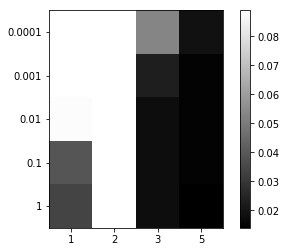

array([[ 8.9,  8.9,  5.3,  1.9],
       [ 8.9,  8.9,  2.3,  1.5],
       [ 8.8,  8.9,  1.8,  1.5],
       [ 3.9,  8.9,  1.8,  1.5],
       [ 3.4,  8.9,  1.8,  1.4]])

In [193]:
training_error_plt = plt.imshow(training_errors_to_plt,cmap="gist_gray")
plt.colorbar()
plt.xticks(np.arange(4),(1,2,3,5))
plt.yticks(np.arange(5),(0.0001, 0.001, 0.01, 0.1, 1))
plt.show()
training_errors_to_plt *100

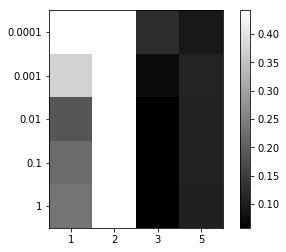

array([[ 44.16666667,  44.16666667,  12.46666667,   9.43333333],
       [ 37.4       ,  44.16666667,   7.5       ,  11.16666667],
       [ 18.8       ,  44.16666667,   6.        ,  10.93333333],
       [ 21.9       ,  44.16666667,   5.83333333,  11.        ],
       [ 23.23333333,  44.16666667,   5.8       ,  10.83333333]])

In [194]:
training_error_plt = plt.imshow(test_errors_to_plt,cmap="gist_gray")
plt.colorbar()
plt.xticks(np.arange(4),(1,2,3,5))
plt.yticks(np.arange(5),(0.0001, 0.001, 0.01, 0.1, 1))
plt.show()
test_errors_to_plt * 100

** Analysis and Conclusion **

    1. On what basis would you decide that a hyperparameter setting is optimal? Which setting of (C, d) gave the optimal results?

I would decide the optimal hyperparameter setting based on the classification error on the test (not training) set. Based on this rationale setting (C,d) to (1,3) is optimal.

    2. You’ll notice that between C and d, one factor mattered far more than the other. What can you conclude about the structure of the datasets and how they were generated?

It is clear from the error chart above that modifications to d (the degree of the polynomial) were more effective than modications to C the penalty on misclassified points. The error rate is greatly reduced when we move from a polynomial of degree 2 to one of degree 3. It then increases again when a polynomial of degree 5 is fitted. Indicating the data is best segmented using a decision boundary implemented by a polynomial of degree 3.

    3. With as much granularity as possible, which hyperparameter settings are underfitting and which are 
    overfitting What allows you to make this claim?

Clearly an SVM with polynomial of degree 1 or 2, underfits the data as the training error rate is high (8.9%) and modifications to the C hyperparameter did noy yield a lower error rate. This is proven by the fact that the error rate on the test data is extermely high (44.16%). Moving to the highest degree of polynomial tested (5) yeilds a very low training error rate (<2% for all C tested) but results in high test data error rates, suggesting this polynomial overfits the data. A similar logic can be applied to the modification of the penalty C. For all polynomials of degree 1 and 5 it is evident that overfitting occurs when we too harshly penalise misclassified points in the training data, as the training error rate drops as C increases to 0.0001, but in the test set; a lower error rate is observed for SVM's trained with a value of C = 0.01.




# 2 - K-Fold Cross Validation

In [187]:
# split data into 7 parts 
k_part_xs = np.array_split(train_xs,7)
k_part_ys = np.array_split(train_ys,7)

In [188]:
# train the SVC on the first 1/7th of the data then compute error on the other 6/7ths
# for each gamma in {0.001, 0.01, 0.1, 1, 10, 100, 1000}
training_errors, param, sigma_errors = np.empty(7), 0, 0
# change gamma and fit model to each data subet, record training set error on other 6/7th of data then average
for g in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    clf = SVC(kernel='rbf',gamma=g)
    for i in range(7):
        # train on everything but the selected portion - then test on that
        k_minus_1_parts_xs = k_part_xs[0:i] + k_part_xs[i+1:]
        k_minus_1_parts_ys = k_part_ys[0:i] + k_part_ys[i+1:]
        xs = np.concatenate(k_minus_1_parts_xs, axis=0)
        ys = np.concatenate(k_minus_1_parts_ys, axis=0)
        clf.fit(xs,ys)
        sigma_errors += 1 - clf.score(k_part_xs[i],k_part_ys[i])
    average_error = sigma_errors / 7
    training_errors[param]  = average_error
    param += 1

In [189]:
error_table = pd.DataFrame(columns=[0.001, 0.01, 0.1, 1, 10, 100, 1000],data=[training_errors])

In [190]:
error_table

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
0,0.089031,0.13502,0.172018,0.219013,0.30504,0.394071,0.483101
